In [372]:
!git clone https://github.com/MinkyuRamen/hackaton_1128.git

fatal: destination path 'hackaton_1128' already exists and is not an empty directory.


In [373]:
import pandas as pd
y = pd.read_csv("/content/hackaton_1128/preprocess_data/한국출생아.csv", index_col = 0)

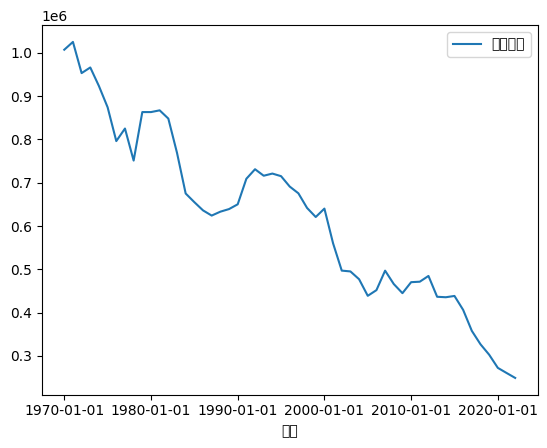

In [374]:
import matplotlib.pyplot as plt
y.plot()
plt.show()

In [375]:
y.head()

,출생아수
시점,
1970-01-01,1007000.0
1971-01-01,1025000.0
1972-01-01,953000.0
1973-01-01,966000.0
1974-01-01,923000.0


In [376]:
# stationary_y = y.diff().dropna() # ADF Test 결과 stationary
# stationary_y.plot()
# plt.show()

In [377]:
pip install QuantLib-Python

In [378]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from QuantLib import *

In [379]:
ydat = np.array(y) # 일반 y

In [346]:
# y.diff().dropna().head()

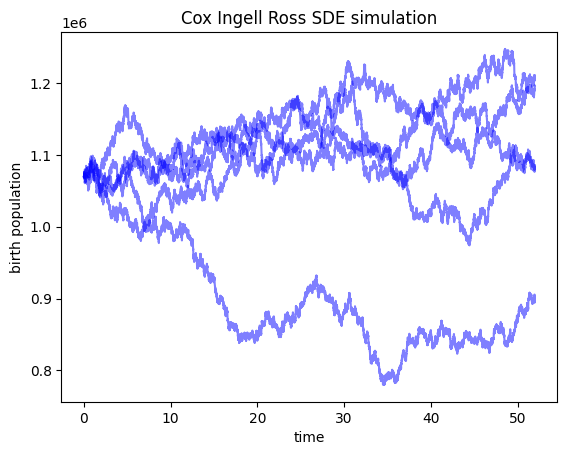

In [380]:
import numpy as np
import matplotlib.pyplot as plt

# CIR 모형의 시간에 따라 변하는 파라미터를 정의하는 함수
def alpha_t(t, r, k):
    return r + k * t

# CIR 모형 시뮬레이션을 위한 함수
def simulate_cir_population(T, num_steps, num_simulations, initial_population, params):
    r, k, mu, sigma = params
    dt = T / num_steps
    t_values = np.linspace(0, T, num_steps + 1)

    # 각 시뮬레이션에서의 결과를 저장할 배열
    population_all = np.zeros((num_simulations, num_steps + 1))

    for j in range(num_simulations):
        population = np.zeros(num_steps + 1)
        population[0] = initial_population

        for i in range(num_steps):
            alpha = alpha_t(t_values[i], r, k)
            dW = np.random.normal(0, np.sqrt(dt))
            population[i + 1] = (
                population[i] + alpha * (mu - population[i] / initial_population) * dt + sigma * np.sqrt(abs(population[i])) * dW
            )

        population_all[j, :] = population

    return population_all

# 파라미터 설정
T = 52
num_steps = 52*365 # dt
num_simulations = 100 # number of sample
initial_population = 1070000  # 초기 인구

r0 = 2  # 초기 증가율
k0 = 2  # 시간에 따른 증가율
mu0 = 2 # 평균
sigma0 = 20  # 변동성
init_params = [r0, k0, mu0, sigma0]

t_values = np.linspace(0, T, num_steps + 1) # year
T_values = np.linspace(52+1, num_steps, 52).astype(int) # real


# CIR 모형 시뮬레이션
population_all = simulate_cir_population(T, num_steps, num_simulations, initial_population, init_params)

# 결과 시각화 (시뮬레이션 결과 중 5개만 표시)
for j in range(5):
    plt.plot(t_values, population_all[j, :], label=f'Simulation {j + 1}', color = "blue", alpha = 0.5)

plt.title('Cox Ingell Ross SDE simulation')
plt.xlabel('time')
plt.ylabel('birth population')
plt.show()

In [381]:
population_all[:,T_values].shape

(100, 52)

In [382]:
# optimization
# result = minimize(lambda params: -np.sum((np.mean(simulate_cir_population(T, num_steps, num_simulations, initial_population, params))[:,T_values] - stationary_y['출생아수'].values)**2), init_params, method = "BFGS")

In [383]:
y.tail()

,출생아수
시점,
2018-01-01,326800.0
2019-01-01,302700.0
2020-01-01,272300.0
2021-01-01,260600.0
2022-01-01,249100.0


In [384]:
# extract the optimized hyper-parameters
# r_fit, k_fit, mu_fit, sigma_fit = result.x

# print the estimated parameters
# print(f"Estimated r + k*t (alpha(t)) : {r_fit, k_fit}")
# print(f"Estimated mu : {mu_fit}")
# print(f"Estimated sigma : {sigma_fit}")

# simulate CIR process for the next 50 times steps(500 samples)
future_steps = 50
predicted_data_samples_cir = simulate_cir_population(future_steps,
                                                     num_steps = future_steps*365,
                                                     num_simulations = 1000,
                                                     initial_population = 249100.0,
                                                     params = init_params)

In [385]:
predicted_data_samples_cir.shape

(1000, 18251)

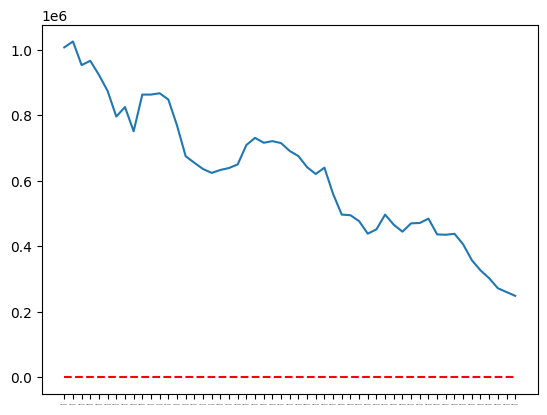

In [354]:
# Plot the original data and the mean of predicted CIR values
plt.plot(y.index, y['출생아수'], label='Original Data')
plt.hlines(y=0, xmin = 0, xmax = 52, color = "red", linestyles="--")
plt.xticks(fontsize = 0)
plt.show()

In [355]:
t_values_pred = np.linspace(1, future_steps, future_steps*365+1)

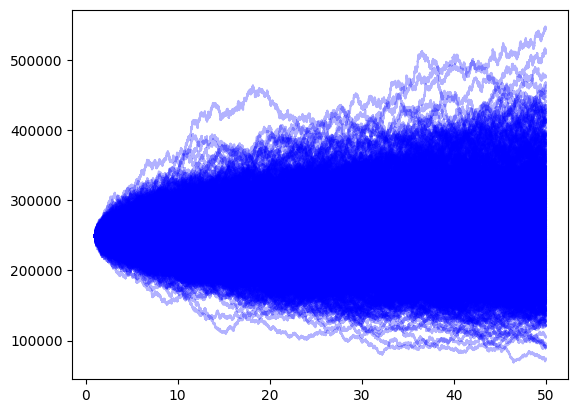

In [356]:
for j in range(1000):
    plt.plot(t_values_pred, predicted_data_samples_cir[j, :], label=f'Simulation {j + 1}', color = "blue", alpha = 0.3)

Text(0.5, 1.0, 'Stochastic Process of BIRTH POPULATION 50 years with daily update')

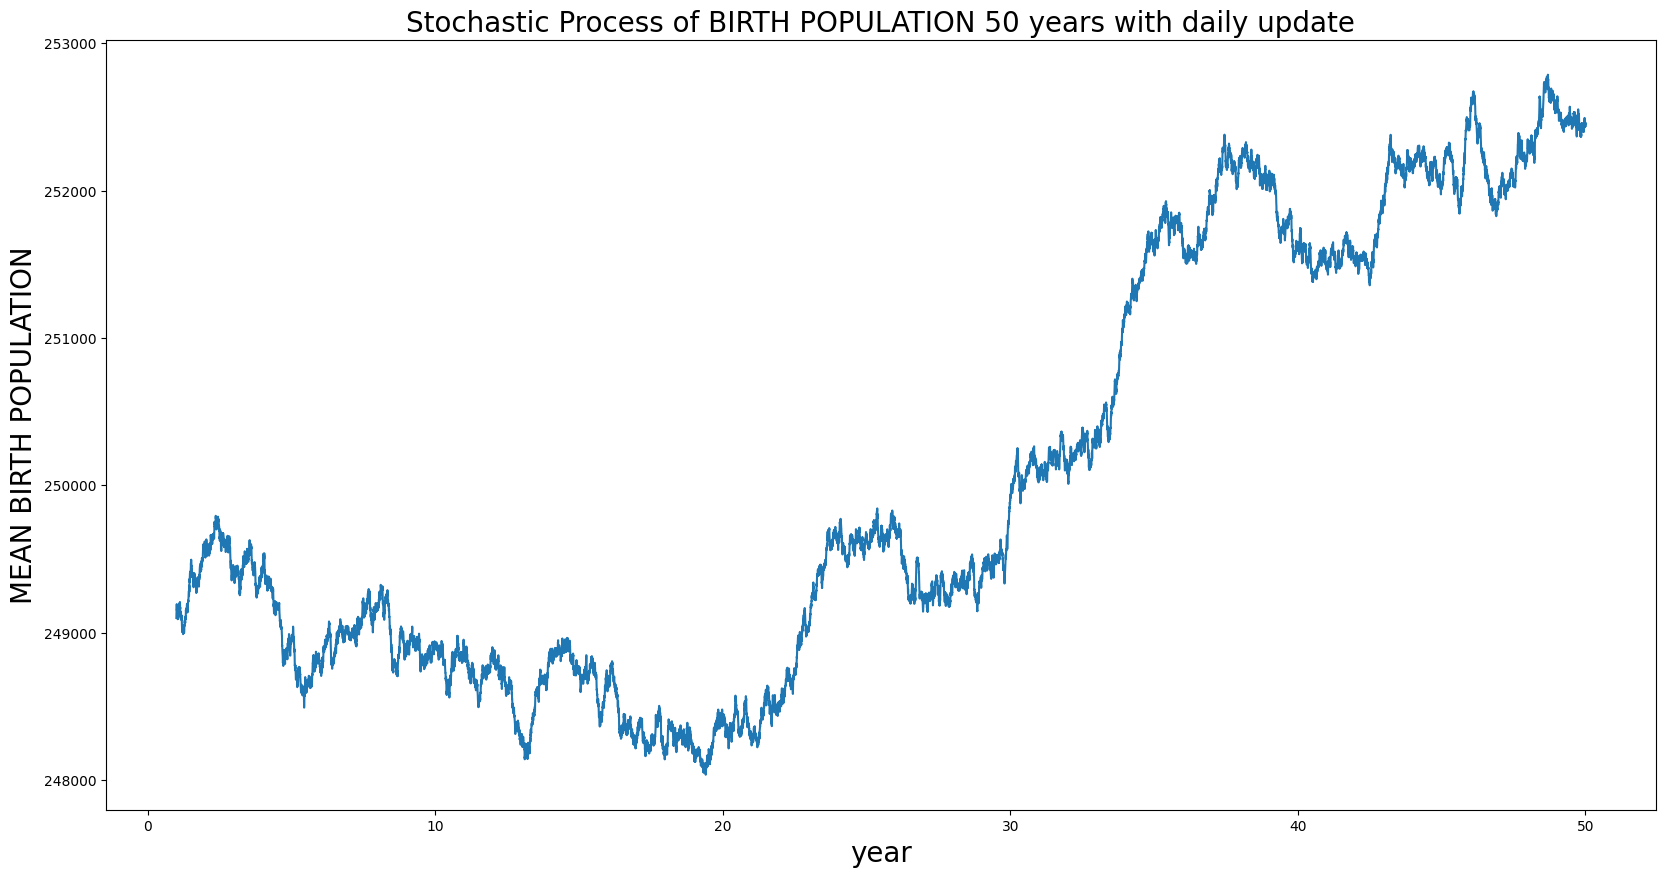

In [357]:
plt.figure(figsize = (20,10))
plt.plot(t_values_pred, np.mean(predicted_data_samples_cir, axis = 0))
plt.xlabel("year", fontsize = 20)
plt.ylabel("MEAN BIRTH POPULATION", fontsize = 20)
plt.title("Stochastic Process of BIRTH POPULATION 50 years with daily update", fontsize = 20)

In [358]:
y['출생아수'].iloc[-1]

249100.0

In [359]:
pd.DataFrame(ydat)

,0
0,1007000.0
1,1025000.0
2,953000.0
3,966000.0
4,923000.0
5,874000.0
6,796000.0
7,825000.0
8,751000.0
9,863000.0


In [ ]:
# raw_y = np.r_[y['출생아수'].iloc[-1], ydiff].cumsum()[1:]

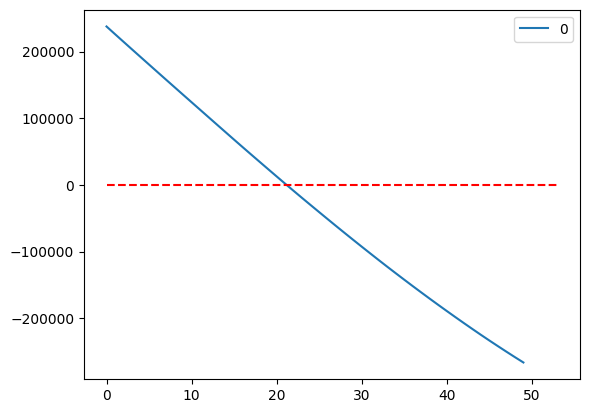

In [ ]:
# pd.DataFrame(raw_y).plot()
# plt.hlines(y = 0, xmin = 0, xmax = 53, color = "red", linestyle = "--")

In [360]:
import os
os.getcwd()

'/content'

Text(0.5, 1.0, 'Stochastic Process of BIRTH POPULATION 50 years with daily update (median)')

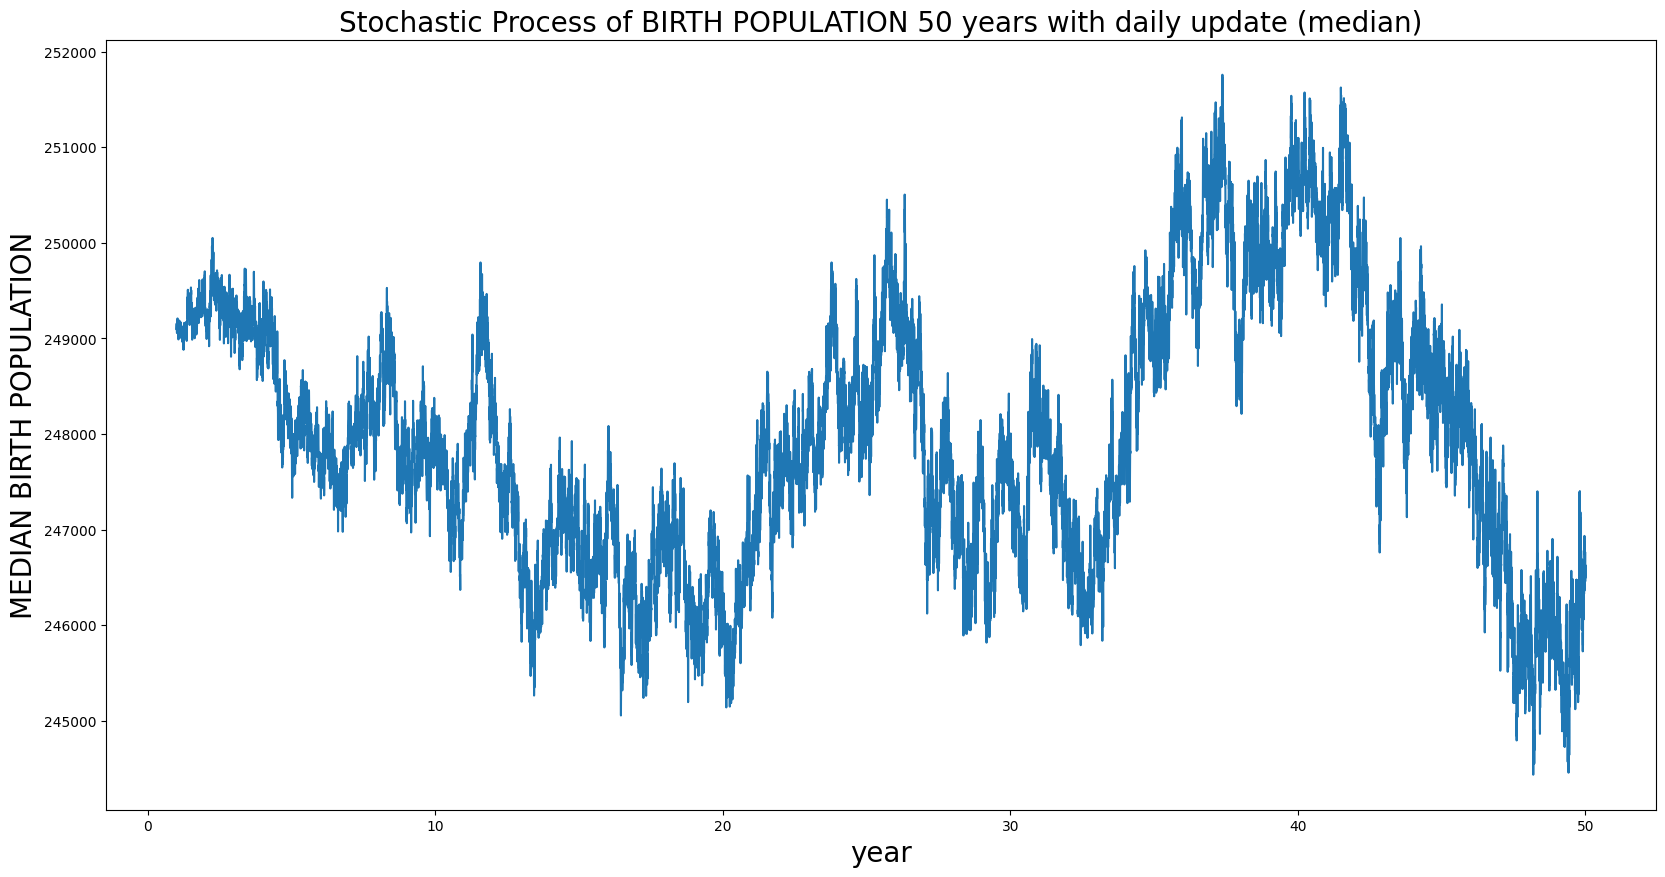

In [361]:
plt.figure(figsize = (20,10))
plt.plot(t_values_pred, np.median(predicted_data_samples_cir, axis = 0))
plt.xlabel("year", fontsize = 20)
plt.ylabel("MEDIAN BIRTH POPULATION", fontsize = 20)
plt.title("Stochastic Process of BIRTH POPULATION 50 years with daily update (median)", fontsize = 20)

In [362]:
T_values_pred = np.linspace(future_steps+1, future_steps*365, future_steps).astype(int)

In [363]:
T_values_pred.__len__()

50

In [364]:
predicted_data_samples_cir[:,T_values_pred].shape

(1000, 50)

In [365]:
T_values_pred[9]

3393

<Axes: ylabel='Density'>

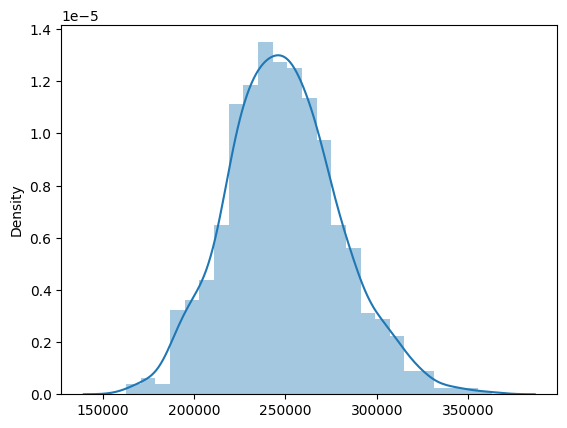

In [366]:
# 10 year future distribution for next day
year10pred = predicted_data_samples_cir[:,T_values_pred[9]]
import seaborn as sns
sns.distplot(year10pred)

In [370]:
y_ = pd.DataFrame(predicted_data_samples_cir)
y_ = y_.iloc[:,T_values_pred]
y_.to_csv('/content/y_prediction_yearly.csv')

In [369]:
T_values_pred

array([   51,   422,   793,  1165,  1536,  1908,  2279,  2650,  3022,
        3393,  3765,  4136,  4507,  4879,  5250,  5622,  5993,  6364,
        6736,  7107,  7479,  7850,  8221,  8593,  8964,  9336,  9707,
       10079, 10450, 10821, 11193, 11564, 11936, 12307, 12678, 13050,
       13421, 13793, 14164, 14535, 14907, 15278, 15650, 16021, 16392,
       16764, 17135, 17507, 17878, 18250])

In [371]:
y_

,51,422,793,1165,1536,1908,2279,2650,3022,3393,...,14907,15278,15650,16021,16392,16764,17135,17507,17878,18250
0,245500.871599,257103.727580,252521.354471,231021.824955,230684.862443,218389.575226,215637.779114,218896.227530,227120.627944,222079.635342,...,204644.204481,173380.454900,185960.933988,193871.138263,200169.753145,205457.071634,203332.635640,190184.517619,190389.003057,197169.996090
1,246978.711742,249057.597522,242884.515849,251363.207065,254335.626548,249260.932395,241166.194884,257969.252088,250048.365932,218919.643427,...,192353.507515,198418.091420,188792.757613,186289.400116,190826.789530,188313.465674,168131.688431,166869.983743,161568.553858,150222.802024
2,251122.230909,254860.140414,265394.550395,265066.782923,238243.738039,232772.250840,235975.912269,243298.552495,231346.131524,233993.388132,...,270008.530463,284225.889108,290082.035145,292328.376437,282969.622497,291966.049746,273610.245329,279531.635544,288644.914278,293960.496317
3,243500.330010,230827.360075,231709.181627,243750.385485,229086.920225,231671.115279,229608.339782,235652.716289,221467.074750,232383.625217,...,249944.468115,246321.089904,246257.435007,245033.835703,256447.263971,252724.171029,259280.325473,237675.188322,249700.772520,265236.080226
4,250650.115340,252598.584613,259736.588847,252921.576481,234924.280667,219711.800177,211539.094693,209691.075643,213794.186458,233825.417968,...,171990.483733,166675.841544,175801.150054,167610.534169,173906.898347,186023.787348,183106.924437,186126.883435,184586.042632,173275.959168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,250724.371911,262906.256467,260313.800859,258294.248291,255942.190067,244568.173893,241244.400874,246272.308838,253081.399375,247637.438438,...,265414.879583,267968.925983,275513.476790,273379.452467,263894.407819,256424.017103,257112.364393,256149.221393,244344.221367,260223.810637
996,241447.040422,238172.195763,231901.690330,246090.174453,236055.912404,233354.627614,235946.277907,249998.735479,252919.162201,274404.902458,...,268821.654601,281394.516501,291525.827396,308364.098209,294415.305977,290495.917673,289726.553542,284040.817980,277501.466804,263393.738370
997,253277.356429,265787.863116,247921.577773,249880.865390,250780.047260,239941.932429,236049.011504,229870.874503,232009.325701,222730.761889,...,168740.977800,170352.453851,176238.837419,178455.614577,173531.977063,177620.090651,172209.371900,173589.782662,176063.207983,162049.706635
998,253598.492321,257929.950078,263169.913140,265968.420171,278638.621580,278540.293940,290545.112512,272387.750790,261282.164871,259170.510270,...,239233.669520,234327.248888,244873.395772,239458.339849,252673.811366,272958.831052,276666.793514,269716.599246,281344.960833,278758.157135


# Different Optimization (robust to initial parameter setting)


In [ ]:
# optimization
# result_CG = minimize(lambda params: -np.sum((simulate_cir_population(T, num_steps, num_simulations, initial_population, params)[:,T_values] - stationary_y['출생아수'].values)**2), init_params, method = "CG")

In [ ]:
# # extract the optimized hyper-parameters
# r_fit2, k_fit2, mu_fit2, sigma_fit2 = result_CG.x

# # print the estimated parameters
# print(f"Estimated r + k*t (alpha(t)) : {r_fit2, k_fit2}")
# print(f"Estimated mu : {mu_fit2}")
# print(f"Estimated sigma : {sigma_fit2}")

# # simulate CIR process for the next 50 times steps(500 samples)
# future_steps = 50
# predicted_data_samples_cir2 = simulate_cir_population(future_steps,
#                                                      num_steps = future_steps*365,
#                                                      num_simulations = 1000,
#                                                      initial_population = -11500.0,
#                                                      params = [r_fit2, k_fit2, mu_fit2, sigma_fit2])

In [ ]:
# for j in range(1000):
#     plt.plot(t_values_pred, predicted_data_samples_cir2[j, :], label=f'Simulation {j + 1}', color = "blue", alpha = 0.5)

In [ ]:
# plt.figure(figsize = (20,10))
# plt.plot(t_values_pred, np.mean(predicted_data_samples_cir2, axis = 0))
# plt.xlabel("year", fontsize = 20)
# plt.ylabel("MEAN BIRTH POPULATION ", fontsize = 20)
# plt.title("Stochastic Process of BIRTH POPULATION 50 year s-  Optim option: CG", fontsize = 20)

In [ ]:
# plt.figure(figsize = (20,10))
# plt.plot(t_values_pred, np.median(predicted_data_samples_cir2, axis = 0))
# plt.xlabel("year", fontsize = 20)
# plt.ylabel("MEDIAN BIRTH POPULATION", fontsize = 20)
# plt.title("Stochastic Process of BIRTH POPULATION 50 years with daily update (median)", fontsize = 20)

# RKHS(banned)

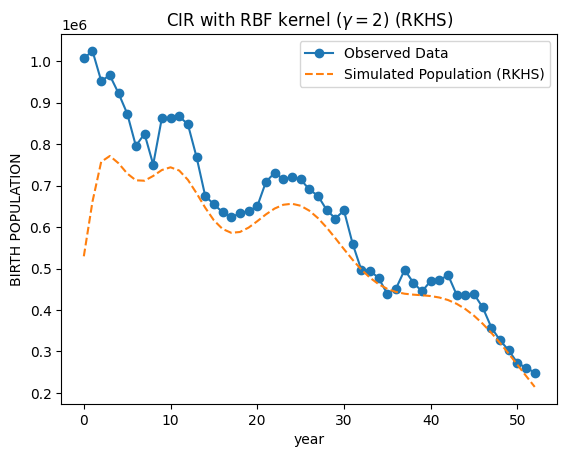

In [ ]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

# CIR 모형의 시간에 따라 변하는 파라미터를 정의하는 함수
def alpha_t(t, r, k):
    return r + k * t

# CIR 모형 시뮬레이션 함수 (인구 예측용으로 수정)
def simulate_cir_population_(T, num_steps, initial_population, r, k, sigma):
    dt = T / num_steps
    t_values = np.linspace(0, T, num_steps + 1)

    # 결과를 저장할 배열
    population = np.zeros(num_steps + 1)
    population[0] = initial_population

    for i in range(num_steps):
        alpha = alpha_t(t_values[i], r, k)
        dW = np.random.normal(0, np.sqrt(dt))
        population[i + 1] = (
            population[i] + alpha * (1 - population[i] / initial_population) * dt + sigma * np.sqrt(abs(population[i])) * dW
        )

    return t_values, population

# 관찰된 데이터
observed_data = np.array(y)

# 초기 추정값 설정
initial_guess = [0.01, 0.0001, 0.1]  # r, k, sigma

# CIR 모형 시뮬레이션 결과를 사용하여 특징 매핑 함수를 생성
def feature_mapping(t_values, r, k, sigma):
    features = np.zeros((len(t_values), 3))
    for i, t in enumerate(t_values):
        alpha = alpha_t(t, r, k)
        features[i, 0] = alpha
        features[i, 1] = np.sqrt(t)
        features[i, 2] = sigma * np.sqrt(t)
    return features

# CIR 모델 학습 및 시뮬레이션
T = len(observed_data) - 1
num_steps = T
initial_population = observed_data[0]

# 특징 매핑
features = feature_mapping(np.arange(T + 1), *initial_guess)

# 커널 트릭을 사용하여 Kernel Ridge Regression 모델 생성
kernel_ridge_model = KernelRidge(kernel='rbf', gamma=2)
kernel_ridge_model.fit(features, observed_data)

# 시뮬레이션 결과 예측
t_values_sim, _ = simulate_cir_population_(T, num_steps, initial_population, *initial_guess)
features_sim = feature_mapping(t_values_sim, *initial_guess)
population_pred = kernel_ridge_model.predict(features_sim)

# 시뮬레이션 결과 시각화
plt.plot(np.arange(T + 1), observed_data, label='Observed Data', marker='o')
plt.plot(np.arange(T + 1), population_pred, label='Simulated Population (RKHS)', linestyle='--')
plt.title('CIR with RBF kernel ($\gamma=2$) (RKHS)')
plt.xlabel('year')
plt.ylabel('BIRTH POPULATION')
plt.legend()
plt.show()


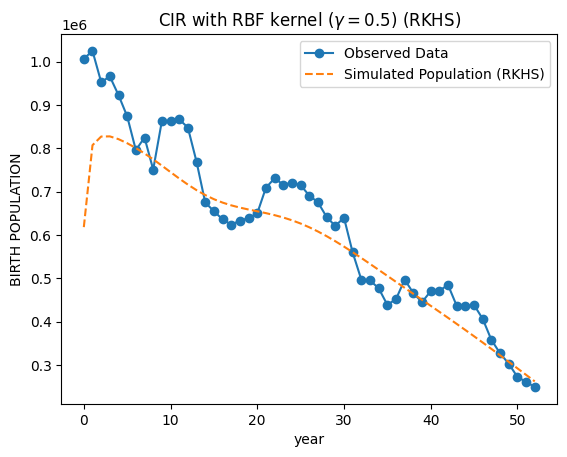

In [ ]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

# CIR 모형의 시간에 따라 변하는 파라미터를 정의하는 함수
def alpha_t(t, r, k):
    return r + k * t

# CIR 모형 시뮬레이션 함수 (인구 예측용으로 수정)
def simulate_cir_population_(T, num_steps, initial_population, r, k, sigma):
    dt = T / num_steps
    t_values = np.linspace(0, T, num_steps + 1)

    # 결과를 저장할 배열
    population = np.zeros(num_steps + 1)
    population[0] = initial_population

    for i in range(num_steps):
        alpha = alpha_t(t_values[i], r, k)
        dW = np.random.normal(0, np.sqrt(dt))
        population[i + 1] = (
            population[i] + alpha * (1 - population[i] / initial_population) * dt + sigma * np.sqrt(abs(population[i])) * dW
        )

    return t_values, population

# 관찰된 데이터
observed_data = np.array(y)

# 초기 추정값 설정
initial_guess = [0.01, 0.0001, 0.1]  # r, k, sigma

# CIR 모형 시뮬레이션 결과를 사용하여 특징 매핑 함수를 생성
def feature_mapping(t_values, r, k, sigma):
    features = np.zeros((len(t_values), 3))
    for i, t in enumerate(t_values):
        alpha = alpha_t(t, r, k)
        features[i, 0] = alpha
        features[i, 1] = np.sqrt(t)
        features[i, 2] = sigma * np.sqrt(t)
    return features

# 주기적 커널을 사용한 커널 리지 회귀 모델 생성
kernel_ridge_model = KernelRidge(kernel='rbf', gamma = 0.5)

# CIR 모델 학습 및 시뮬레이션
T = len(observed_data) - 1
num_steps = T
initial_population = observed_data[0]

# 특징 매핑
features = feature_mapping(np.arange(T + 1), *initial_guess)

# 커널 트릭을 사용하여 Kernel Ridge Regression 모델 생성
kernel_ridge_model.fit(features, observed_data)

# 시뮬레이션 결과 예측
t_values_sim, _ = simulate_cir_population_(T, num_steps, initial_population, *initial_guess)
features_sim = feature_mapping(t_values_sim, *initial_guess)
population_pred = kernel_ridge_model.predict(features_sim)

# 시뮬레이션 결과 시각화
plt.plot(np.arange(T + 1), observed_data, label='Observed Data', marker='o')
plt.plot(np.arange(T + 1), population_pred, label='Simulated Population (RKHS)', linestyle='--')
plt.title('CIR with RBF kernel ($\gamma=0.5$) (RKHS)')
plt.xlabel('year')
plt.ylabel('BIRTH POPULATION')
plt.legend()
plt.show()



In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

# 주어진 데이터
y_data = np.array(y)

# Lipschitz 연속성을 만족하는 함수 생성
def lipschitz_continuous_function(x, y_data, lipschitz_constant):
    def lipschitz_function(t):
        # 목적 함수: 주어진 데이터와의 차이의 제곱의 합
        difference = y_data - t
        return np.sum(difference**2) + lipschitz_constant * np.sum(np.abs(x - t))

    # 최적화 문제를 푸는 함수
    result = minimize_scalar(lipschitz_function, bounds=(min(y_data), max(y_data)), method='bounded')
    optimal_input = result.x
    return optimal_input

# Lipschitz 연속성을 만족하는 함수 생성
lipschitz_constant = 2  # Lipschitz 상수
optimal_input = lipschitz_continuous_function(y_data, y_data, lipschitz_constant)

print("Optimal Input for Lipschitz Function:", optimal_input)


Optimal Input for Lipschitz Function: 621537.8679018544


In [ ]:
init_params

[2, 2, 2, 10]